

<font size="5">   <center> Pre-assignment session: Clustering</center>          
<br>
<center>by</center>  

<font size="5">    <center>Ramesh Kestur, IIIT-b</center>   
<br>
<center><font size="3"> Public profile</center>
<br>
<center><a href="https://www.linkedin.com/in/rameshkestur/" target="_blank">Linked In</a></center> 
<br>  
<center><a href="https://www.researchgate.net/profile/Ramesh_Kestur" target="_blank">Research Gate</a></center> 
<br> 
<center><a href="https://scholar.google.co.in/citations?user=P28Shk8AAAAJ&hl=en" target="_blank">Google Scholar</a></center>





This analysis is an illustration for the POWEGRID clustering assignment. Analysis is carried out on tomato prices across all APMC markets in Karnataka. Clustering is carried out on the modal prices. Data is analysed for two years.


In [54]:
import pandas as pd
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sklearn
import sklearn.datasets
import scipy
from PIL import Image
from scipy import ndimage
from numpy import nan
from pandas import read_csv
import seaborn as sns
import os
import matplotlib.dates as mdates 

from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
%matplotlib inline

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
!pwd

/home/iiitb/research/Tomato price forecast/data


In [57]:
os.getcwd()

'/home/iiitb/research/Tomato price forecast/data'

In [58]:
os.chdir('/home/iiitb/research/Tomato price forecast/data')

In [59]:
!pwd

/home/iiitb/research/Tomato price forecast/data


Loading the data set.....

In [7]:
tomato = pd.read_excel('tomato_01_01_2019_to_31_12_2020_curated.xlsx', index_col=1, parse_dates=['Date'])

Let us look at the size of the dataset. (a) The number of rows/tuples and the number of columns or variables. (b)The header or column names

In [60]:
tomato.head()

,Market,Variety,Grade,Arrivals,Min,Max,Modal
Date,,,,,,,
2020-01-01,ARSIKERE,TOMATO,AVERAGE,10,1000,1000,1000
2019-01-08,ARSIKERE,TOMATO,AVERAGE,238,725,1000,1000
2019-02-08,ARSIKERE,TOMATO,AVERAGE,208,1000,1000,1000
2019-03-09,ARSIKERE,TOMATO,AVERAGE,160,563,563,563
2019-04-10,ARSIKERE,TOMATO,AVERAGE,100,540,540,540


In [66]:
tomato.describe()

,Arrivals,Min,Max,Modal
count,13595.000000,13595.000000,13595.000000,13595.000000
mean,1058.544171,959.672527,1749.508202,1342.149099
std,2703.833791,753.548130,1059.902628,796.746844
min,1.000000,50.000000,100.000000,100.000000
25%,30.000000,400.000000,1000.000000,750.000000
50%,165.000000,700.000000,1500.000000,1150.000000
75%,713.000000,1250.000000,2400.000000,1800.000000
max,30627.000000,7500.000000,30000.000000,9500.000000


In [67]:
print(tomato.shape)
(tomato.head())

(13595, 7)


,Market,Variety,Grade,Arrivals,Min,Max,Modal
Date,,,,,,,
2020-01-01,ARSIKERE,TOMATO,AVERAGE,10,1000,1000,1000
2019-01-08,ARSIKERE,TOMATO,AVERAGE,238,725,1000,1000
2019-02-08,ARSIKERE,TOMATO,AVERAGE,208,1000,1000,1000
2019-03-09,ARSIKERE,TOMATO,AVERAGE,160,563,563,563
2019-04-10,ARSIKERE,TOMATO,AVERAGE,100,540,540,540


Let us check if there are any null values

In [68]:
tomato.isnull().sum()

Market      0
Variety     0
Grade       0
Arrivals    0
Min         0
Max         0
Modal       0
dtype: int64

In [69]:
# mark all missing values
tomato.replace('?', nan, inplace=True)

In [70]:
# print(dataset.head())
tomato.head()

,Market,Variety,Grade,Arrivals,Min,Max,Modal
Date,,,,,,,
2020-01-01,ARSIKERE,TOMATO,AVERAGE,10,1000,1000,1000
2019-01-08,ARSIKERE,TOMATO,AVERAGE,238,725,1000,1000
2019-02-08,ARSIKERE,TOMATO,AVERAGE,208,1000,1000,1000
2019-03-09,ARSIKERE,TOMATO,AVERAGE,160,563,563,563
2019-04-10,ARSIKERE,TOMATO,AVERAGE,100,540,540,540


A few key points:a) header=0 means you have the names of columns in the first row in the file and if you don't you will have to specify header=Noneb) index_col = index in the data frame, you might want to set it to true if the first column is really an index or specify the field name. In our case it is the 'datetime' field

In [71]:
print(tomato.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13595 entries, 2020-01-01 to 2020-12-31
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Market    13595 non-null  object
 1   Variety   13595 non-null  object
 2   Grade     13595 non-null  object
 3   Arrivals  13595 non-null  int64 
 4   Min       13595 non-null  int64 
 5   Max       13595 non-null  int64 
 6   Modal     13595 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 849.7+ KB
None 



In [75]:
tomato.describe()

,Arrivals,Min,Max,Modal
count,13595.000000,13595.000000,13595.000000,13595.000000
mean,1058.544171,959.672527,1749.508202,1342.149099
std,2703.833791,753.548130,1059.902628,796.746844
min,1.000000,50.000000,100.000000,100.000000
25%,30.000000,400.000000,1000.000000,750.000000
50%,165.000000,700.000000,1500.000000,1150.000000
75%,713.000000,1250.000000,2400.000000,1800.000000
max,30627.000000,7500.000000,30000.000000,9500.000000


 Let us now move on to analysis

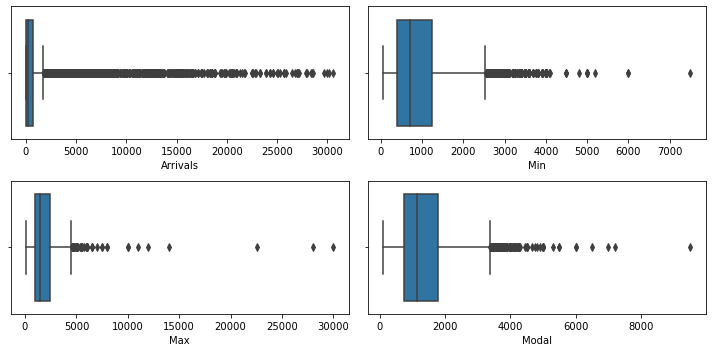

In [72]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(tomato['Arrivals'], ax = axs[0,0])
plt2 = sns.boxplot(tomato['Min'], ax = axs[0,1])
plt3 = sns.boxplot(tomato['Max'], ax = axs[1,0])
plt4 = sns.boxplot(tomato['Modal'], ax = axs[1,1])


plt.tight_layout()


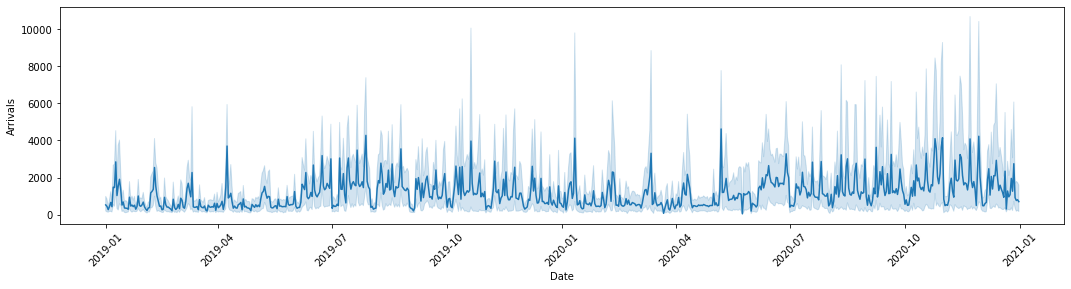

In [73]:
   # Time Series Plot
plt.figure(figsize=(18,4))
sns.lineplot(data = tomato['Arrivals'])
plt.xticks(rotation=45)
plt.show()

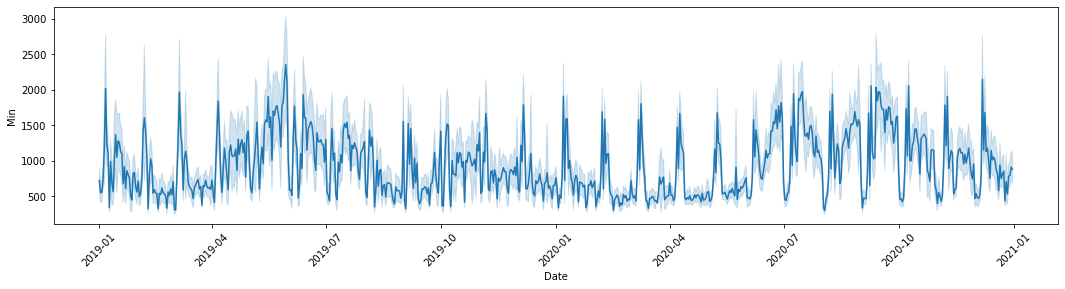

In [17]:
   # Time Series Plot
plt.figure(figsize=(18,4))
sns.lineplot(data = tomato['Min'])
plt.xticks(rotation=45)
plt.show()

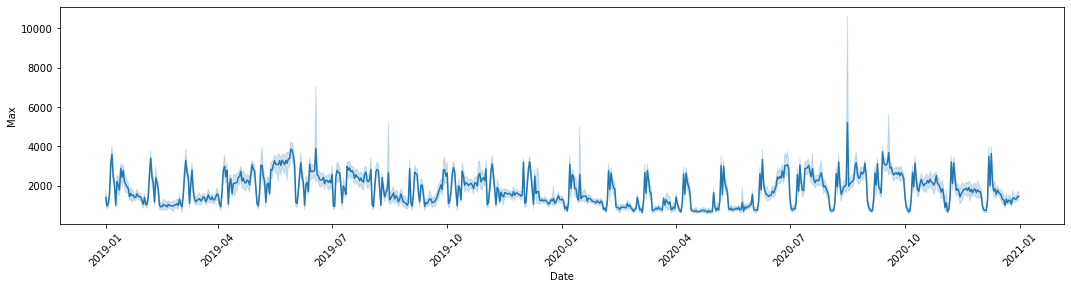

In [18]:
   # Time Series Plot
plt.figure(figsize=(18,4))
sns.lineplot(data = tomato['Max'])
plt.xticks(rotation=45)
plt.show()

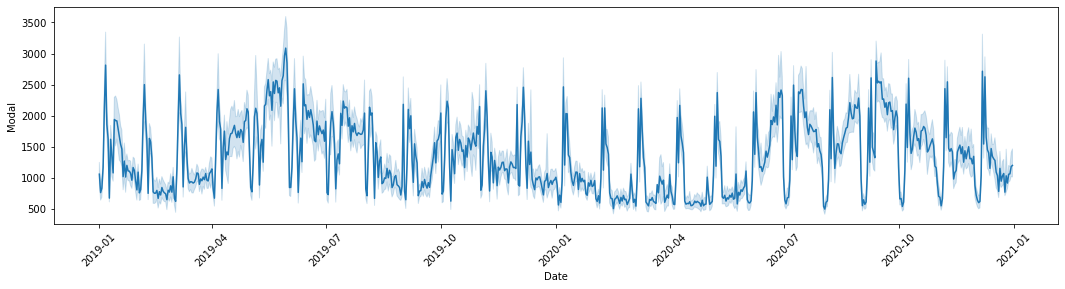

In [19]:
   # Time Series Plot
plt.figure(figsize=(18,4))
sns.lineplot(data = tomato['Modal'])
plt.xticks(rotation=45)
plt.show()

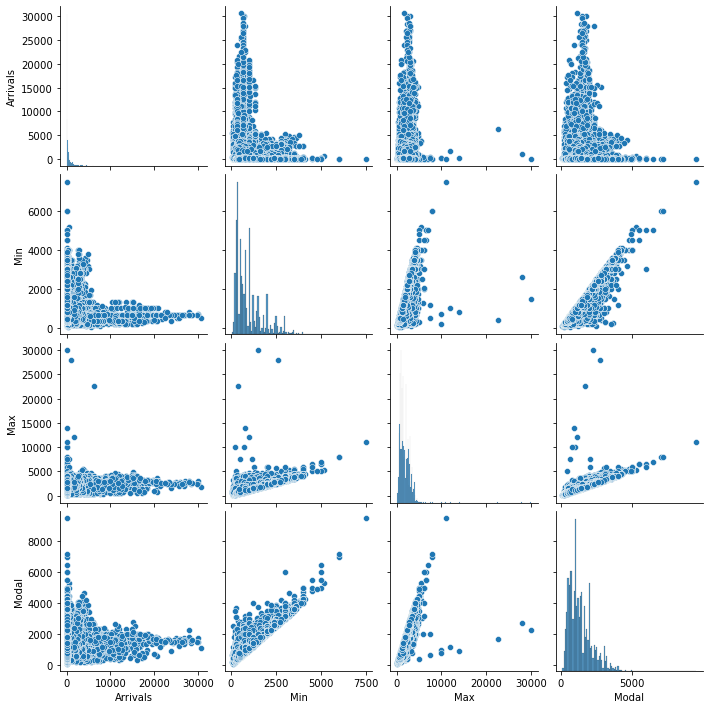

In [20]:
sns.pairplot(tomato)
plt.show()

<AxesSubplot:>

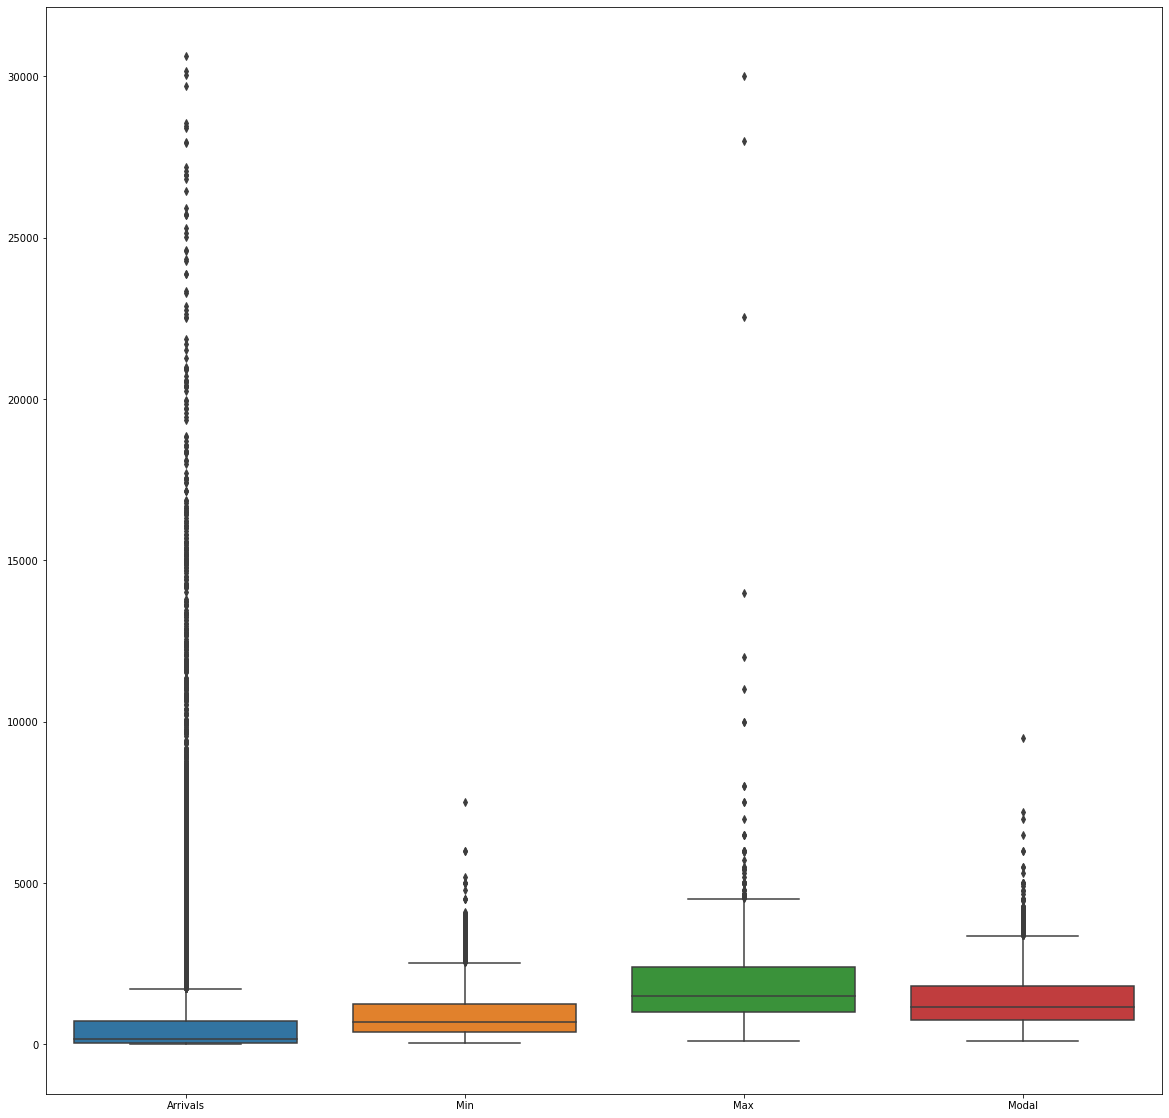

In [74]:
#sns.boxplot(data=tomato, palette="Set3")
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(ax=ax, data=tomato)

<AxesSubplot:>

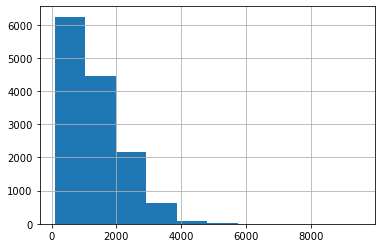

In [22]:
tomato.Modal.hist()


<AxesSubplot:>

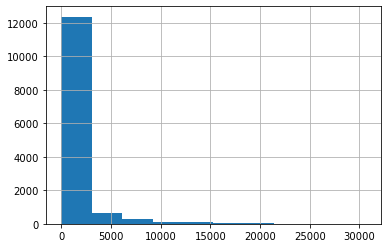

In [23]:
tomato.Arrivals.hist()

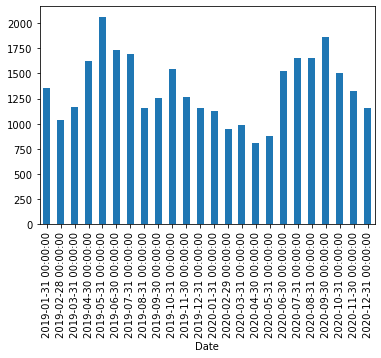

In [24]:
tomato_xaxis = tomato['Modal'].resample('M').mean().plot(kind='bar')


In [76]:
tomato_monthly_average = pd.DataFrame()
tomato_monthly_average['Modal']=tomato['Modal'].resample('M').mean()
tomato_monthly_average['Min']=tomato['Min'].resample('M').mean()
tomato_monthly_average['Max']=tomato['Max'].resample('M').mean()

In [77]:
tomato_weekly_average=pd.DataFrame()
tomato_weekly_average['Modal']=tomato['Modal'].resample('W').mean()
tomato_weekly_average['Min']=tomato['Min'].resample('W').mean()
tomato_weekly_average['Max']=tomato['Max'].resample('W').mean()

In [78]:
print(tomato_weekly_average.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 2019-01-06 to 2021-01-03
Freq: W-SUN
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Modal   105 non-null    float64
 1   Min     105 non-null    float64
 2   Max     105 non-null    float64
dtypes: float64(3)
memory usage: 3.3 KB
None 



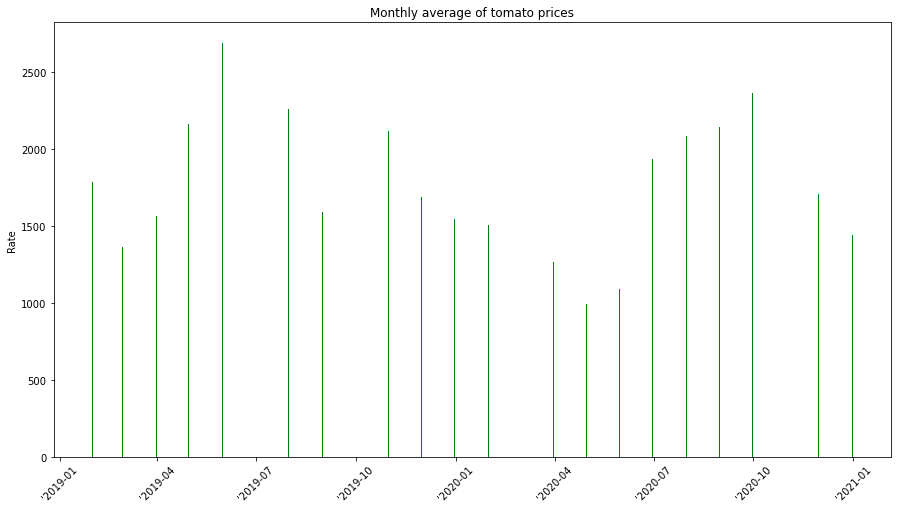

In [79]:


fig, ax = plt.subplots(figsize=(15,8))
ax.plot(kind='bar')
# ax.width=.3
ax.bar(tomato_monthly_average.index.values, tomato_monthly_average['Modal'],
       color='red')
ax.bar(tomato_monthly_average.index.values, tomato_monthly_average['Max'],
       color='green')
ax.bar(tomato_monthly_average.index.values, tomato_monthly_average['Min'],
       color='green')
plt.xticks(rotation=45)
plt.ylabel('Rate')

myFmt = mdates.DateFormatter("'%Y-%m")
ax.xaxis.set_major_formatter(myFmt)
plt.title('Monthly average of tomato prices')

plt.show()

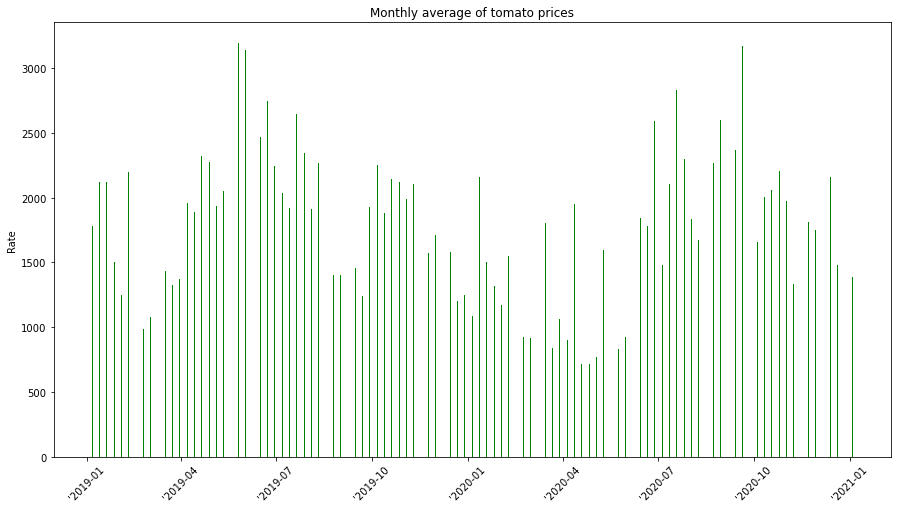

In [80]:


fig, ax = plt.subplots(figsize=(15,8))
ax.plot(kind='bar')
# ax.width=.3
ax.bar(tomato_weekly_average.index.values, tomato_weekly_average['Modal'],
       color='red')
ax.bar(tomato_weekly_average.index.values, tomato_weekly_average['Max'],
       color='green')
ax.bar(tomato_weekly_average.index.values, tomato_weekly_average['Min'],
       color='green')
plt.xticks(rotation=45)
plt.ylabel('Rate')

myFmt = mdates.DateFormatter("'%Y-%m")
ax.xaxis.set_major_formatter(myFmt)
plt.title('Monthly average of tomato prices')

plt.show()

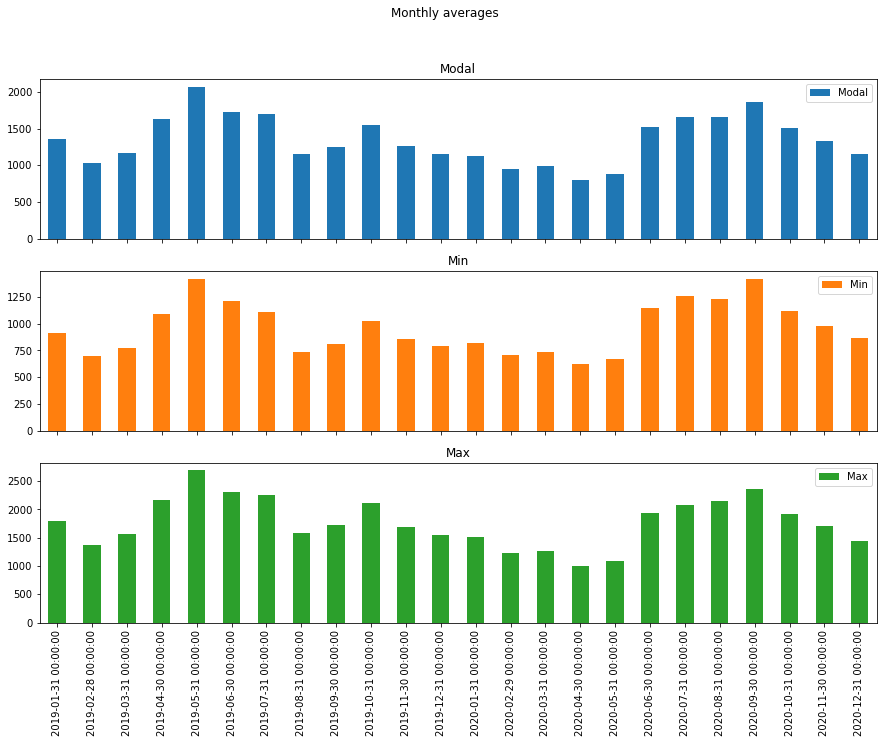

In [81]:

#fig = plt.figure(figsize = (10,6))
# ax = plt.subplot
# ax = xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m")

tomato_monthly_average.plot(kind='bar', subplots=True, grid=False, title="Monthly averages",
        layout=(3,1), sharex=True, sharey=False, legend=True, figsize = (15,10) )
        
plt.show()

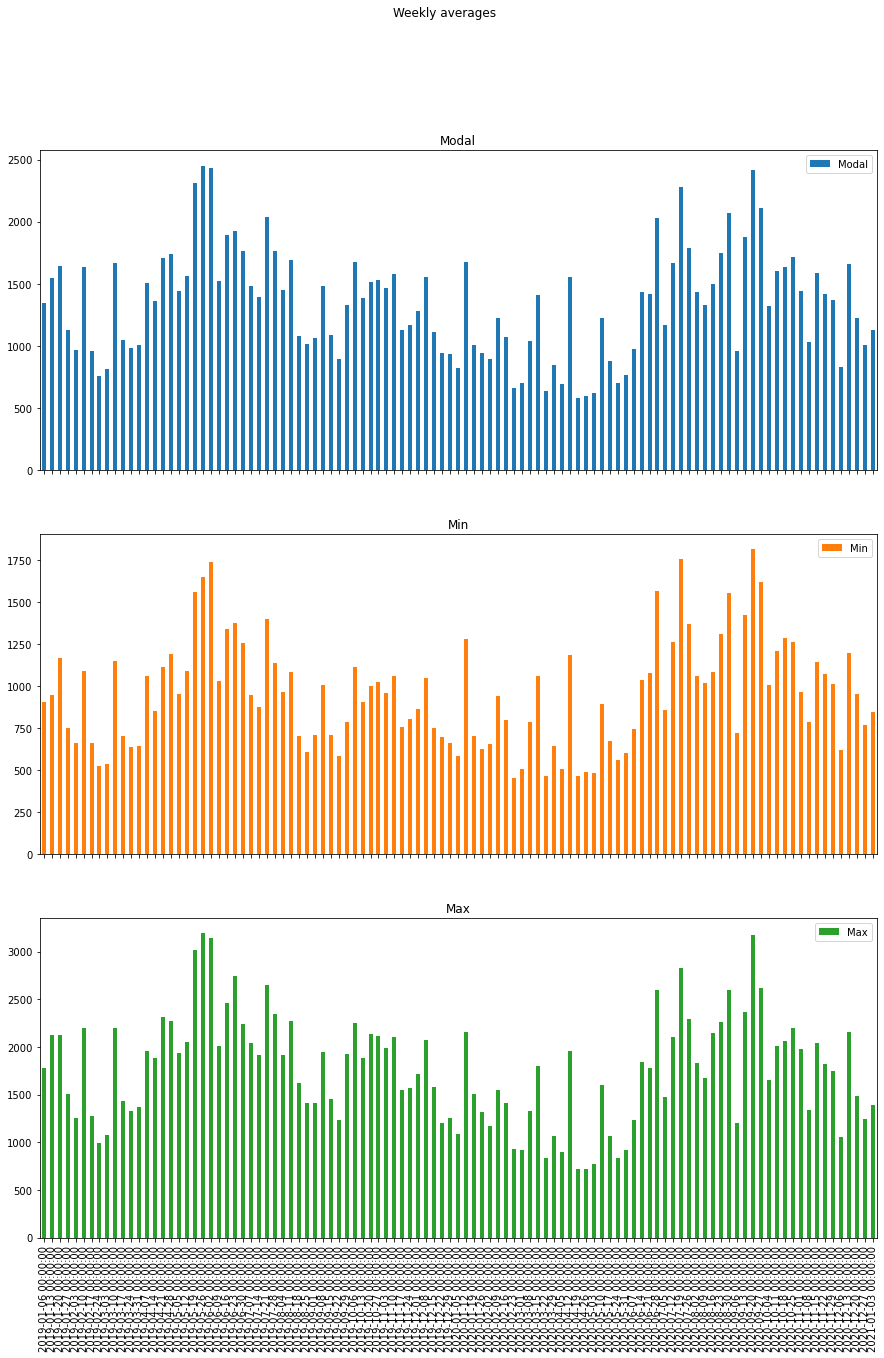

In [82]:

tomato_weekly_average.plot(kind='bar', subplots=True, grid=False, title="Weekly averages",
        layout=(3,1), sharex=True, sharey=False, legend=True, figsize = (15,20) )
        
plt.show()

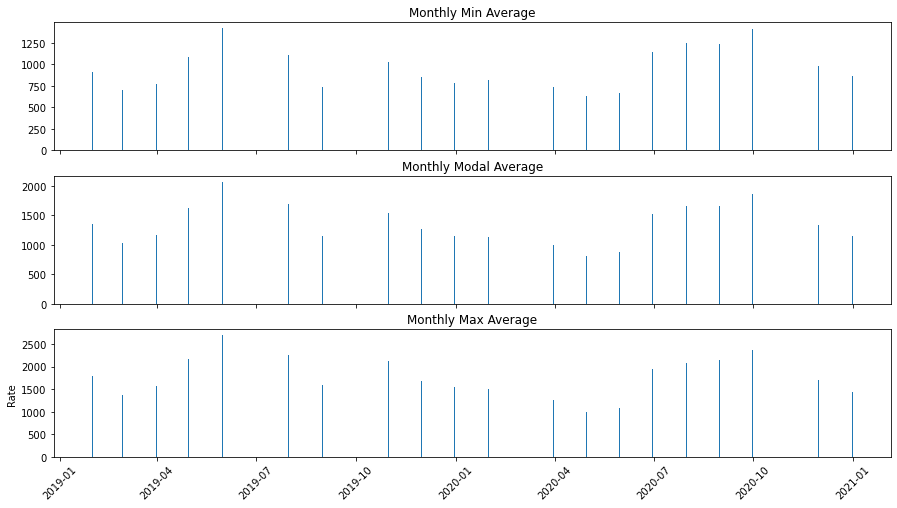

In [83]:
# Two subplots, the axes array is 1-d
fig, ax = plt.subplots(3, figsize=(15,8), sharex=True)
plt.title('Monthly averages')

# width = 0.3
ax[0].bar(tomato_monthly_average.index.values, tomato_monthly_average['Min'])
ax[0].set_title('Monthly Min Average')
ax[1].bar(tomato_monthly_average.index.values, tomato_monthly_average['Modal'])
ax[1].set_title('Monthly Modal Average')
ax[2].bar(tomato_monthly_average.index.values, tomato_monthly_average['Max'])
ax[2].set_title('Monthly Max Average')
plt.xticks(rotation=45)
plt.ylabel('Rate')
# bar_width = 0.5

plt.show()

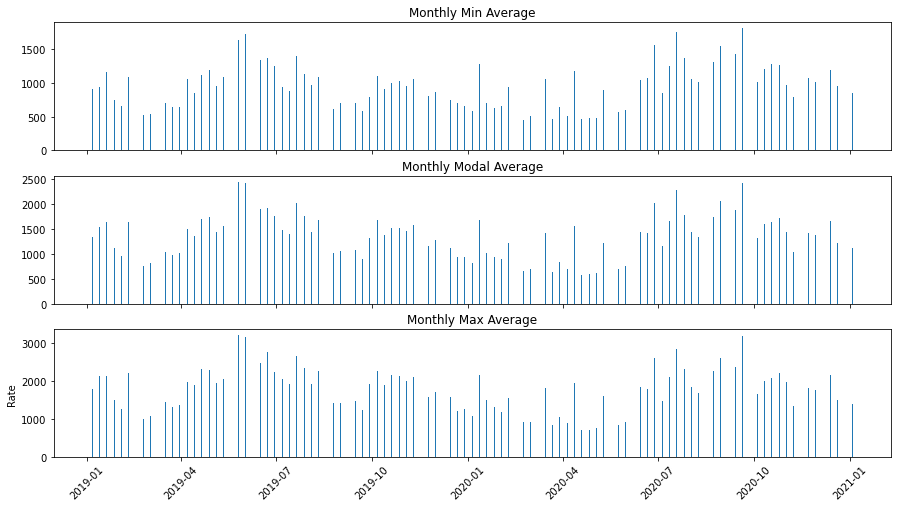

In [84]:
# Two subplots, the axes array is 1-d
fig, ax = plt.subplots(3, figsize=(15,8), sharex=True)
plt.title('Weekly averages')

# width = 0.3
ax[0].bar(tomato_weekly_average.index.values, tomato_weekly_average['Min'])
ax[0].set_title('Monthly Min Average')
ax[1].bar(tomato_weekly_average.index.values, tomato_weekly_average['Modal'])
ax[1].set_title('Monthly Modal Average')
ax[2].bar(tomato_weekly_average.index.values, tomato_weekly_average['Max'])
ax[2].set_title('Monthly Max Average')
plt.xticks(rotation=45)
plt.ylabel('Rate')
# bar_width = 0.5

plt.show()

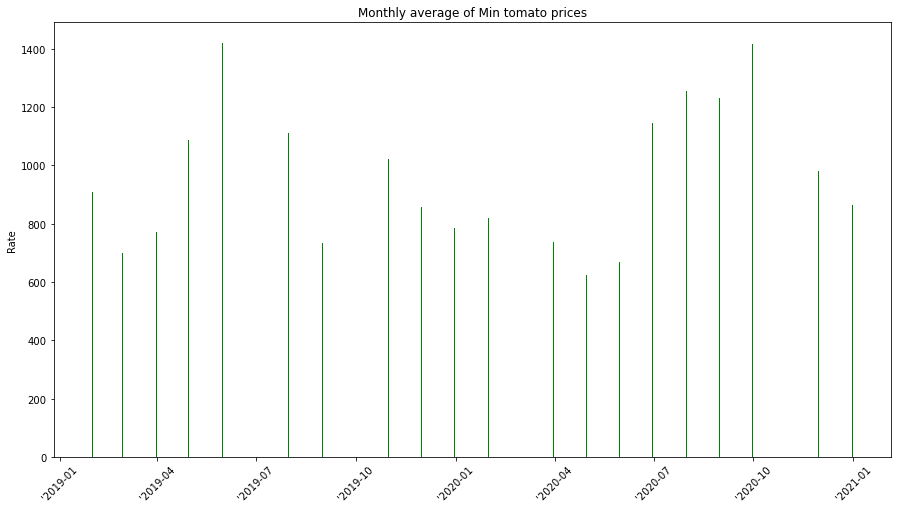

In [85]:

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(kind='bar')
ax.width=.3
ax.bar(tomato_monthly_average.index.values,
       tomato_monthly_average['Min'],
       color='green')

plt.xticks(rotation=45)
plt.ylabel('Rate')

myFmt = mdates.DateFormatter("'%Y-%m")
ax.xaxis.set_major_formatter(myFmt)
plt.title('Monthly average of Min tomato prices')

plt.show()

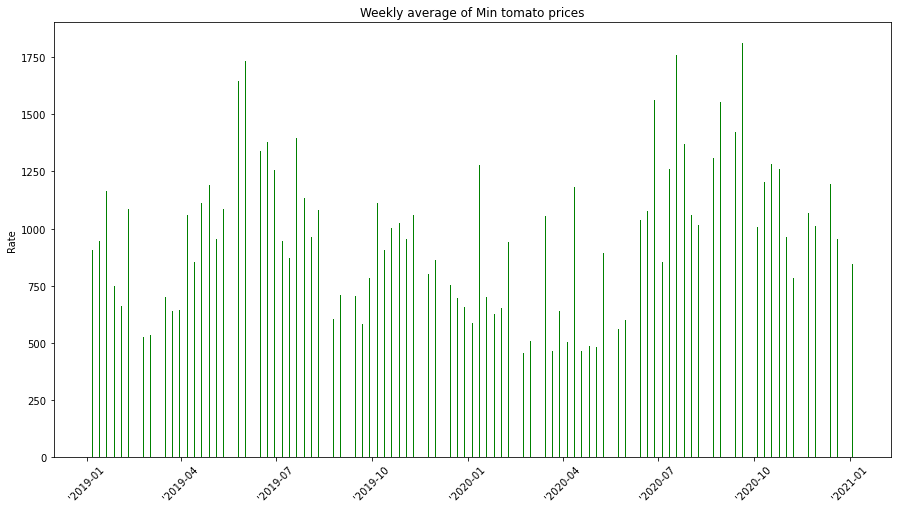

In [86]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(kind='bar')
ax.width=.3
ax.bar(tomato_weekly_average.index.values,
       tomato_weekly_average['Min'],
       color='green')

plt.xticks(rotation=45)
plt.ylabel('Rate')

myFmt = mdates.DateFormatter("'%Y-%m")
ax.xaxis.set_major_formatter(myFmt)
plt.title('Weekly average of Min tomato prices')

plt.show()

<AxesSubplot:ylabel='Modal'>

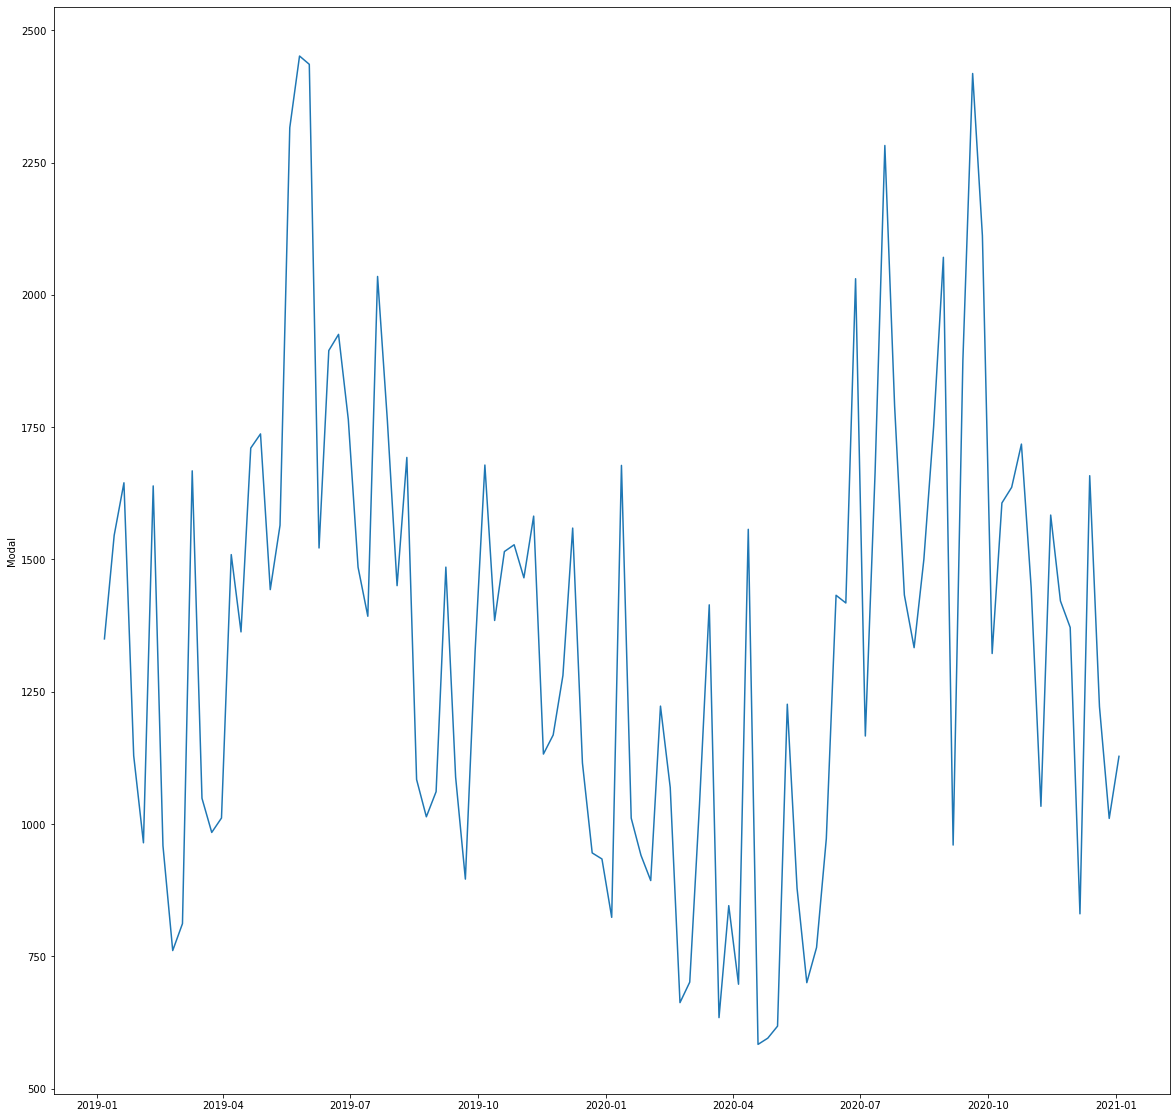

In [87]:
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(ax=ax, data=tomato_weekly_average['Modal'])

<AxesSubplot:ylabel='Modal'>

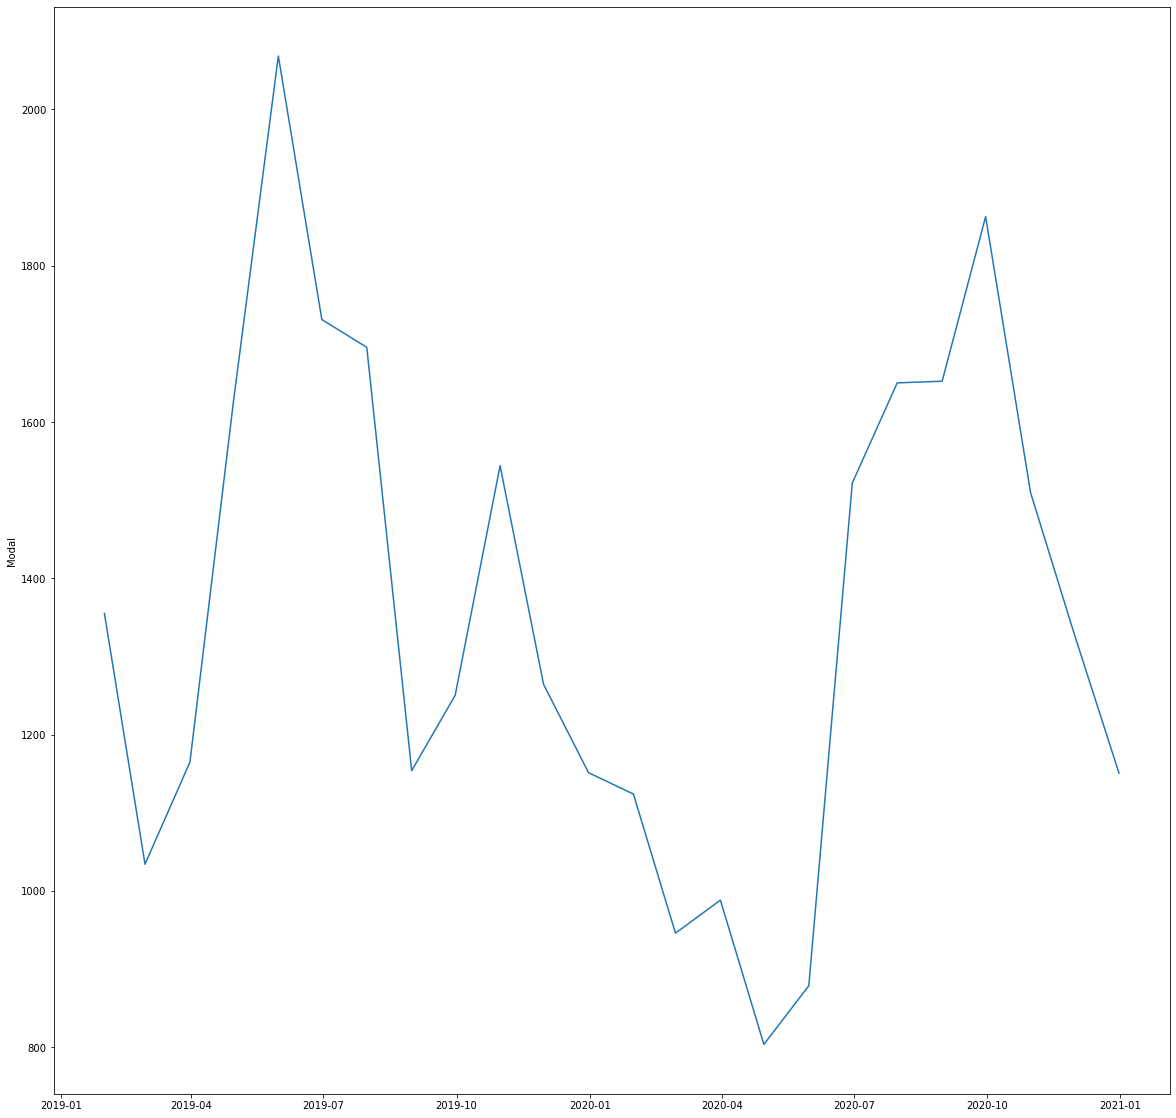

In [88]:
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(ax=ax, data=tomato_monthly_average['Modal'])

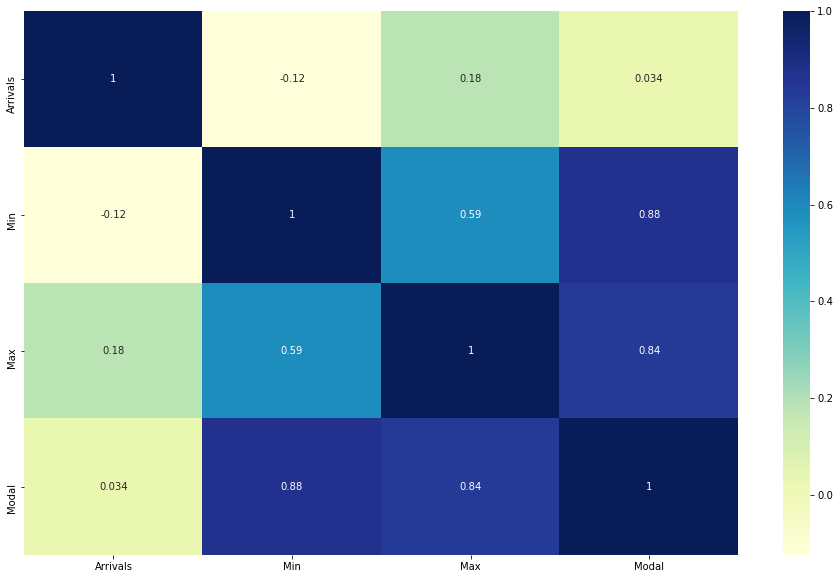

In [90]:
plt.figure(figsize = (16, 10))
sns.heatmap(tomato.corr(), annot = True, cmap="YlGnBu")
plt.show()

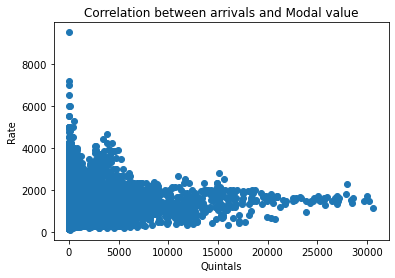

In [91]:
plt.scatter(tomato['Arrivals'],tomato['Modal'])
plt.ylabel('Rate')
plt.xlabel('Quintals')
plt.title('Correlation between arrivals and Modal value')
plt.show()

It can be observed that lower arrivals fetch higher rates. 

<AxesSubplot:xlabel='Date'>

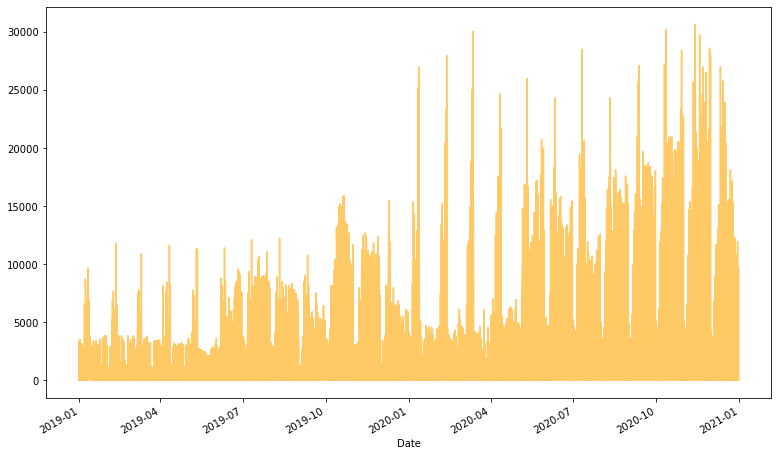

In [92]:
tomato['Arrivals'].plot(figsize=(13,8), legend=False, color='orange', alpha=.6)

In [94]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

sillhoute_scores = []

In [42]:
kmeans_tomato = tomato.drop(['Market','Variety', 'Grade'], axis=1)


In [96]:
kmeans_tomato.shape

(13595, 4)

In [97]:
kmeans_tomato.head()

,Arrivals,Min,Max,Modal
Date,,,,
2020-01-01,10,1000,1000,1000
2019-01-08,238,725,1000,1000
2019-02-08,208,1000,1000,1000
2019-03-09,160,563,563,563
2019-04-10,100,540,540,540


In [98]:
sc = MinMaxScaler()
tomato_scaled = sc.fit_transform(kmeans_tomato)

In [99]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H



In [100]:
hopkins(kmeans_tomato)

0.9945754032748453

In [101]:
tomato_scaled

array([[2.93867955e-04, 1.27516779e-01, 3.01003344e-02, 9.57446809e-02],
       [7.73852282e-03, 9.06040268e-02, 3.01003344e-02, 9.57446809e-02],
       [6.75896297e-03, 1.27516779e-01, 3.01003344e-02, 9.57446809e-02],
       ...,
       [8.16299876e-04, 2.88590604e-01, 7.69230769e-02, 2.34042553e-01],
       [2.77541958e-03, 3.15436242e-01, 9.03010033e-02, 2.65957447e-01],
       [1.89381571e-03, 1.54362416e-01, 4.68227425e-02, 1.38297872e-01]])

In [102]:
#Let's check the silhouette score first to identify the ideal number of clusters
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(tomato_scaled)
    sse_.append([k, silhouette_score(tomato_scaled, kmeans.labels_)])

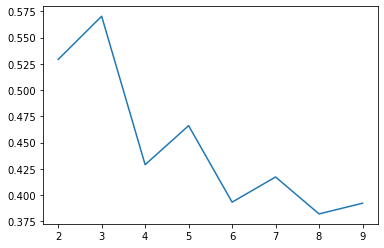

In [103]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [104]:
kmeans_tmt_price= KMeans(n_clusters = 3,  random_state =42, max_iter=100)

In [106]:
kmeans_tmt_price

KMeans(max_iter=100, n_clusters=3, random_state=42)

In [107]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

TypeError: __init__() got an unexpected keyword argument 'n_jobs'

In [108]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10,  precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

TypeError: __init__() got an unexpected keyword argument 'precompute_distances'

In [110]:
kmeans_tmt_price.fit(tomato_scaled)

KMeans(max_iter=100, n_clusters=3, random_state=42)

In [111]:
kmeans_tmt_price.cluster_centers_.shape

(3, 4)

In [112]:
kmeans_tmt_price.cluster_centers_

array([[0.01679778, 0.28286803, 0.09199913, 0.25678428],
       [0.01964106, 0.07901956, 0.04298985, 0.09563773],
       [0.37493675, 0.06779723, 0.08200201, 0.14286265]])

In [113]:
kmeans_tmt_price.labels_

array([1, 1, 1, ..., 0, 0, 1], dtype=int32)

In [114]:
test = pd.DataFrame(tomato)

The kmeans output is an array. This needs to be converted into a data frame

In [115]:
test.head()

,Market,Variety,Grade,Arrivals,Min,Max,Modal
Date,,,,,,,
2020-01-01,ARSIKERE,TOMATO,AVERAGE,10,1000,1000,1000
2019-01-08,ARSIKERE,TOMATO,AVERAGE,238,725,1000,1000
2019-02-08,ARSIKERE,TOMATO,AVERAGE,208,1000,1000,1000
2019-03-09,ARSIKERE,TOMATO,AVERAGE,160,563,563,563
2019-04-10,ARSIKERE,TOMATO,AVERAGE,100,540,540,540


In [117]:
test['Cluster no'] = kmeans_tmt_price.labels_

In [120]:
test.head()

,Market,Variety,Grade,Arrivals,Min,Max,Modal,Cluster no
Date,,,,,,,,
2020-01-01,ARSIKERE,TOMATO,AVERAGE,10,1000,1000,1000,1
2019-01-08,ARSIKERE,TOMATO,AVERAGE,238,725,1000,1000,1
2019-02-08,ARSIKERE,TOMATO,AVERAGE,208,1000,1000,1000,1
2019-03-09,ARSIKERE,TOMATO,AVERAGE,160,563,563,563,1
2019-04-10,ARSIKERE,TOMATO,AVERAGE,100,540,540,540,1


In [121]:
test.columns.values

array(['Market', 'Variety', 'Grade', 'Arrivals', 'Min', 'Max', 'Modal',
       'Cluster no'], dtype=object)

In [124]:
test.index = tomato.index

In [125]:
test.index

DatetimeIndex(['2020-01-01', '2019-01-08', '2019-02-08', '2019-03-09',
               '2019-04-10', '2019-05-09', '2019-06-03', '2020-06-03',
               '2019-06-08', '2019-06-09',
               ...
               '2019-01-30', '2020-07-30', '2020-09-30', '2019-10-30',
               '2020-11-30', '2020-12-30', '2019-07-31', '2020-07-31',
               '2020-08-31', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=13595, freq=None)

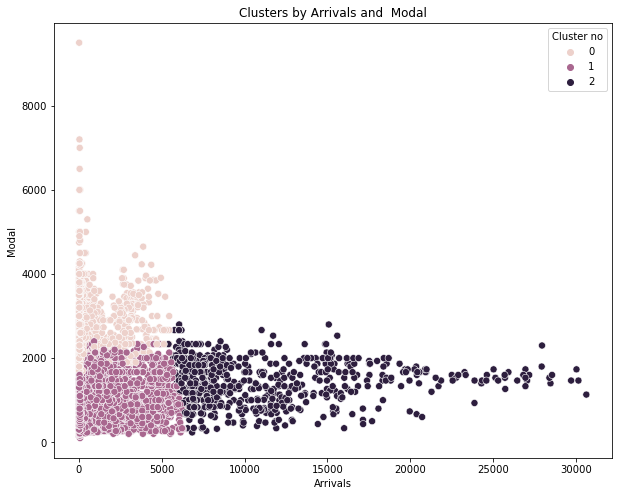

In [126]:
x_axis=test['Arrivals']
y_axis=test['Modal']
plt.figure(figsize =(10,8))
sns.scatterplot(x_axis,y_axis, data=test, s=50, alpha = 1, hue='Cluster no')
plt.title('Clusters by Arrivals and  Modal')
plt.show()

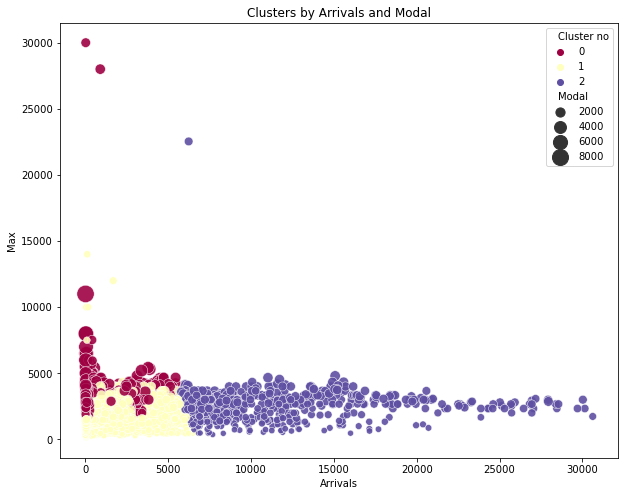

In [127]:
# x_axis=df_sgm_pca_kmeans['Arrivals']
# y_axis=df_sgm_pca_kmeans['Modal']
plt.figure(figsize =(10,8))
sns.scatterplot('Arrivals','Max', s= 50, data=test, hue='Cluster no', palette='Spectral',
                 size ='Modal', sizes=(30, 300), alpha = .9 )
plt.title('Clusters by Arrivals and Modal')
plt.show()


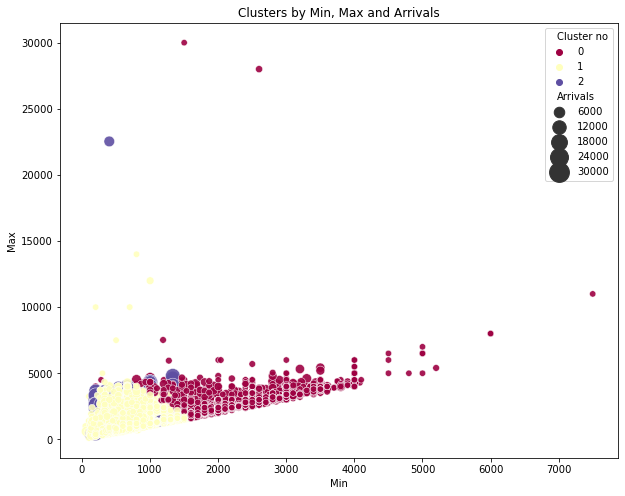

In [128]:
#x_axis=df_segm_pca_kmeans['Arrivals']
#y_axis=df_segm_pca_kmeans['Modal']
plt.figure(figsize =(10,8))
sns.scatterplot(x= 'Min', y='Max', data= test, hue='Cluster no',
                size ='Arrivals', sizes=(40, 400), alpha = .9, palette='Spectral')
plt.title('Clusters by Min, Max and Arrivals')
plt.show()

Outlier Analysis

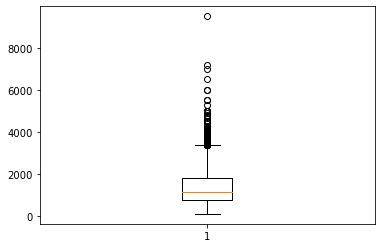

In [129]:
plt.boxplot(test.Modal)
Q1 = test.Modal.quantile(0.25)
Q3 = test.Modal.quantile(0.75)
IQR = Q3 - Q1
test_outlier = test[(test.Modal >= Q1) & (test.Modal <= Q3)]

In [130]:
test_outlier.describe

<bound method NDFrame.describe of               Market Variety    Grade  Arrivals   Min   Max  Modal  Cluster no
Date                                                                          
2020-01-01  ARSIKERE  TOMATO  AVERAGE        10  1000  1000   1000           1
2019-01-08  ARSIKERE  TOMATO  AVERAGE       238   725  1000   1000           1
2019-02-08  ARSIKERE  TOMATO  AVERAGE       208  1000  1000   1000           1
2020-06-03  ARSIKERE  TOMATO  AVERAGE         4  1500  1500   1500           1
2019-06-08  ARSIKERE  TOMATO  AVERAGE       104  1000  1000   1000           1
...              ...     ...      ...       ...   ...   ...    ...         ...
2020-01-29     UDIPI  TOMATO  AVERAGE        47  1400  1600   1500           1
2020-12-29     UDIPI  TOMATO  AVERAGE         7  1200  1400   1300           1
2019-01-30     UDIPI  TOMATO  AVERAGE         8  1600  1900   1800           0
2020-12-30     UDIPI  TOMATO  AVERAGE        56  1200  1500   1400           1
2020-12-31     UDI

In [131]:
test['Cluster no'].value_counts()

1    10095
0     2906
2      594
Name: Cluster no, dtype: int64

In [132]:
test_cluster2 = test_outlier[test_outlier['Cluster no']== 2]

In [133]:
test_cluster2.head

<bound method NDFrame.head of                    Market Variety    Grade  Arrivals   Min   Max  Modal  \
Date                                                                      
2020-12-06  CHICKBALLAPUR  TOMATO  AVERAGE     11700   380  1900   1150   
2020-01-11     CHINTAMANI  TOMATO  AVERAGE      8115   333  2666   1333   
2020-02-08     CHINTAMANI  TOMATO  AVERAGE      6350   533  3000   1666   
2020-02-11     CHINTAMANI  TOMATO  AVERAGE      8400   466  2799   1666   
2020-03-08     CHINTAMANI  TOMATO  AVERAGE      7200   533  2866   1066   
...                   ...     ...      ...       ...   ...   ...    ...   
2019-08-31          KOLAR  TOMATO  AVERAGE      6890   334  1733   1033   
2019-10-31          KOLAR  TOMATO  AVERAGE     11675   334  2667   1034   
2020-10-31          KOLAR  TOMATO  AVERAGE     22555   533  2533   1467   
2020-12-31          KOLAR  TOMATO  AVERAGE      9679   400  1667    933   
2019-04-04         MYSURU  TOMATO  AVERAGE      8112  1150  1400   120

In [134]:
test_cluster2['Cluster no'].value_counts()

2    377
Name: Cluster no, dtype: int64

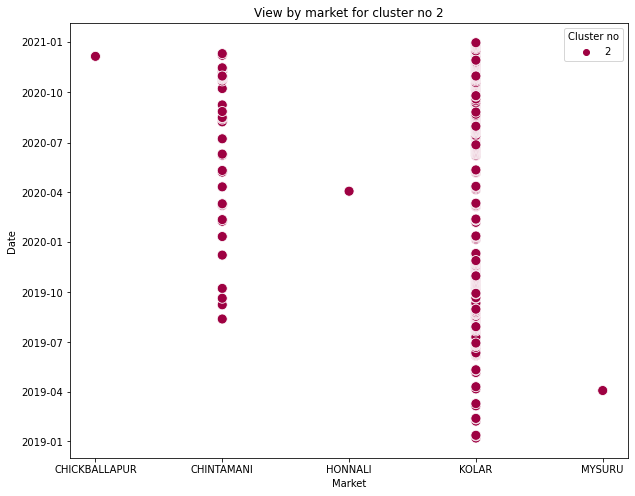

In [135]:
plt.figure(figsize =(10,8))
sns.scatterplot('Market', 'Date', s =100, hue= 'Cluster no',palette='Spectral', data=test_cluster2)
plt.title('View by market for cluster no 2')
plt.show()

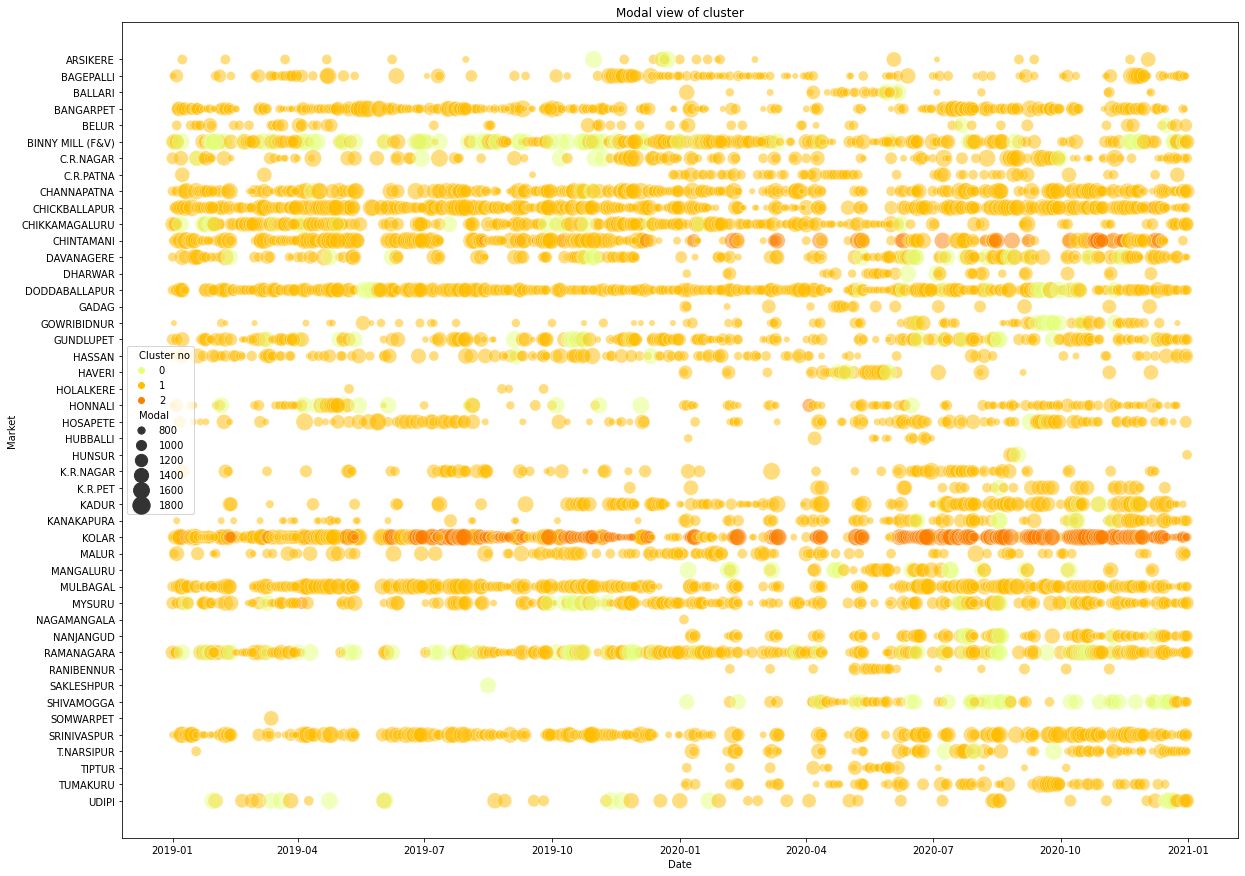

In [137]:
plt.figure(figsize =(20,15))
sns.scatterplot('Date', 'Market', hue= 'Cluster no', data=test_outlier,
size ='Modal', sizes=(40, 300), s = 40, alpha = .5, palette='Wistia')
plt.title('Modal view of cluster')
plt.show()

# tab20b_r

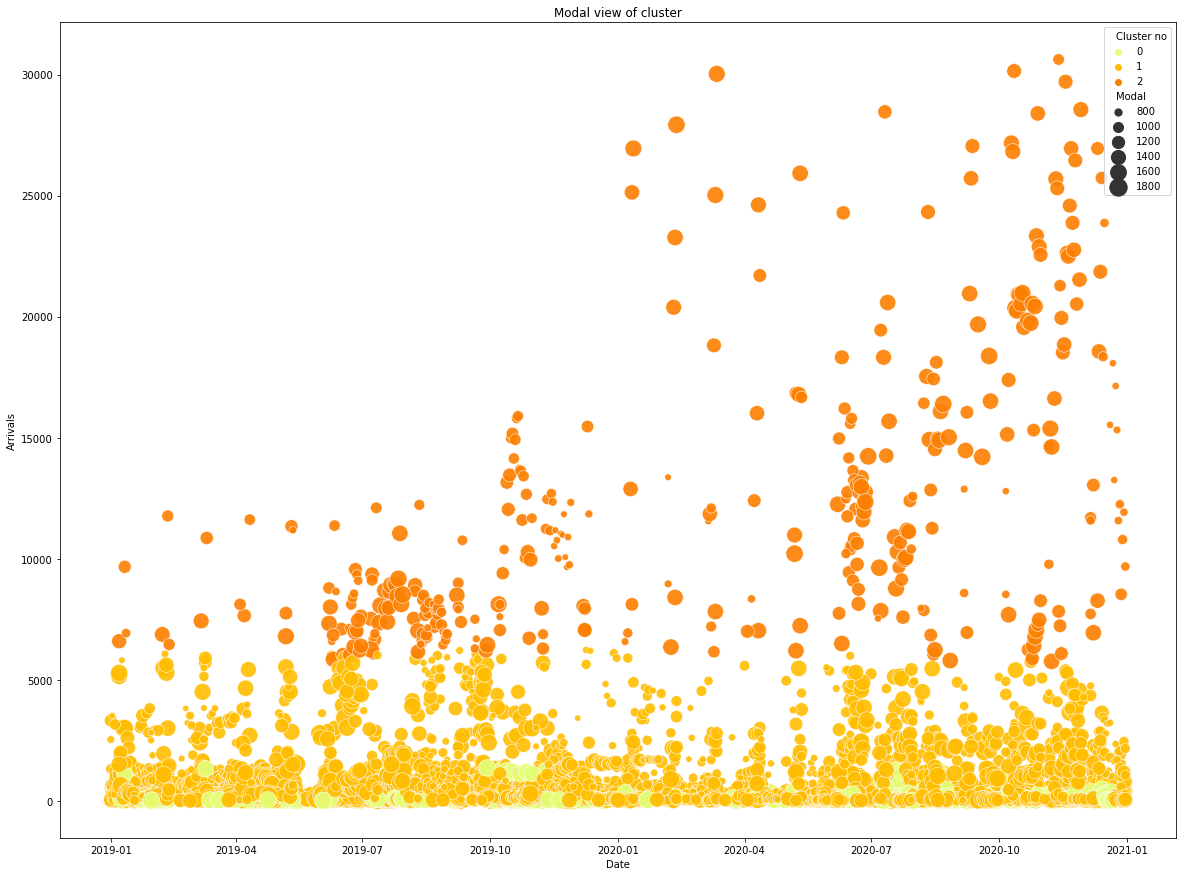

In [138]:
plt.figure(figsize =(20,15))
sns.scatterplot('Date', 'Arrivals', hue= 'Cluster no', data=test_outlier,
size ='Modal', sizes=(40, 300), alpha = .9, palette='Wistia')
plt.title('Modal view of cluster')
plt.show()

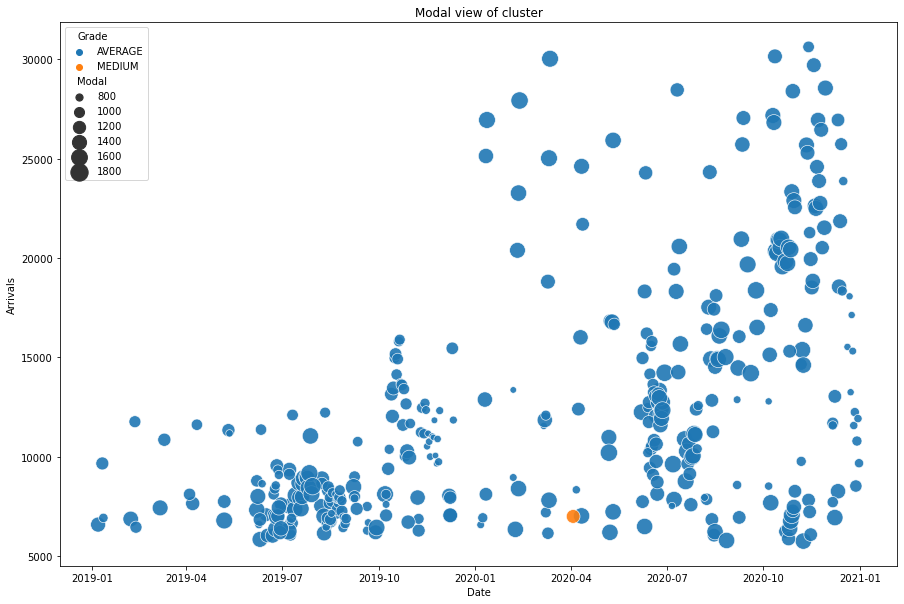

In [139]:
plt.figure(figsize =(15,10))
sns.scatterplot('Date', 'Arrivals', hue= 'Grade', data=test_cluster2,
size ='Modal', sizes=(40, 300), alpha = .9)
plt.title('Modal view of cluster')
plt.show()

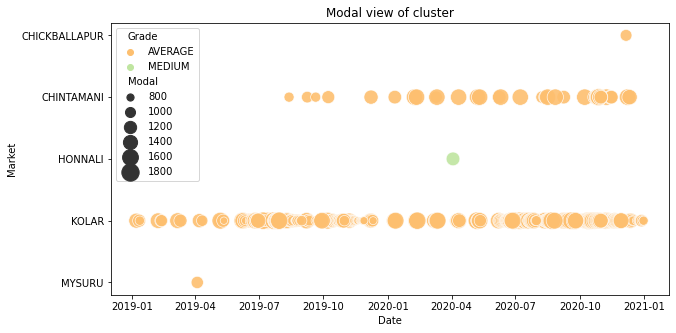

In [140]:
plt.figure(figsize =(10,5))
sns.scatterplot('Date', 'Market', hue= 'Grade', data=test_cluster2,
size ='Modal', sizes=(40, 300), alpha = .9, palette='Spectral')
plt.title('Modal view of cluster')
plt.show()

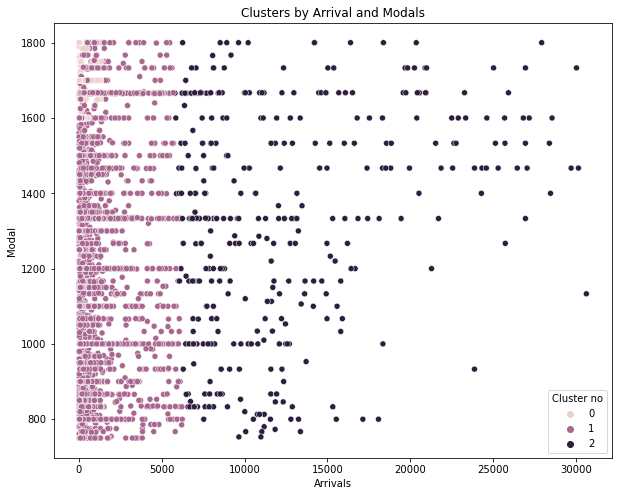

In [141]:

plt.figure(figsize =(10,8))
sns.scatterplot('Arrivals', 'Modal', hue= 'Cluster no', data=test_outlier)
plt.title('Clusters by Arrival and Modals')
plt.show()


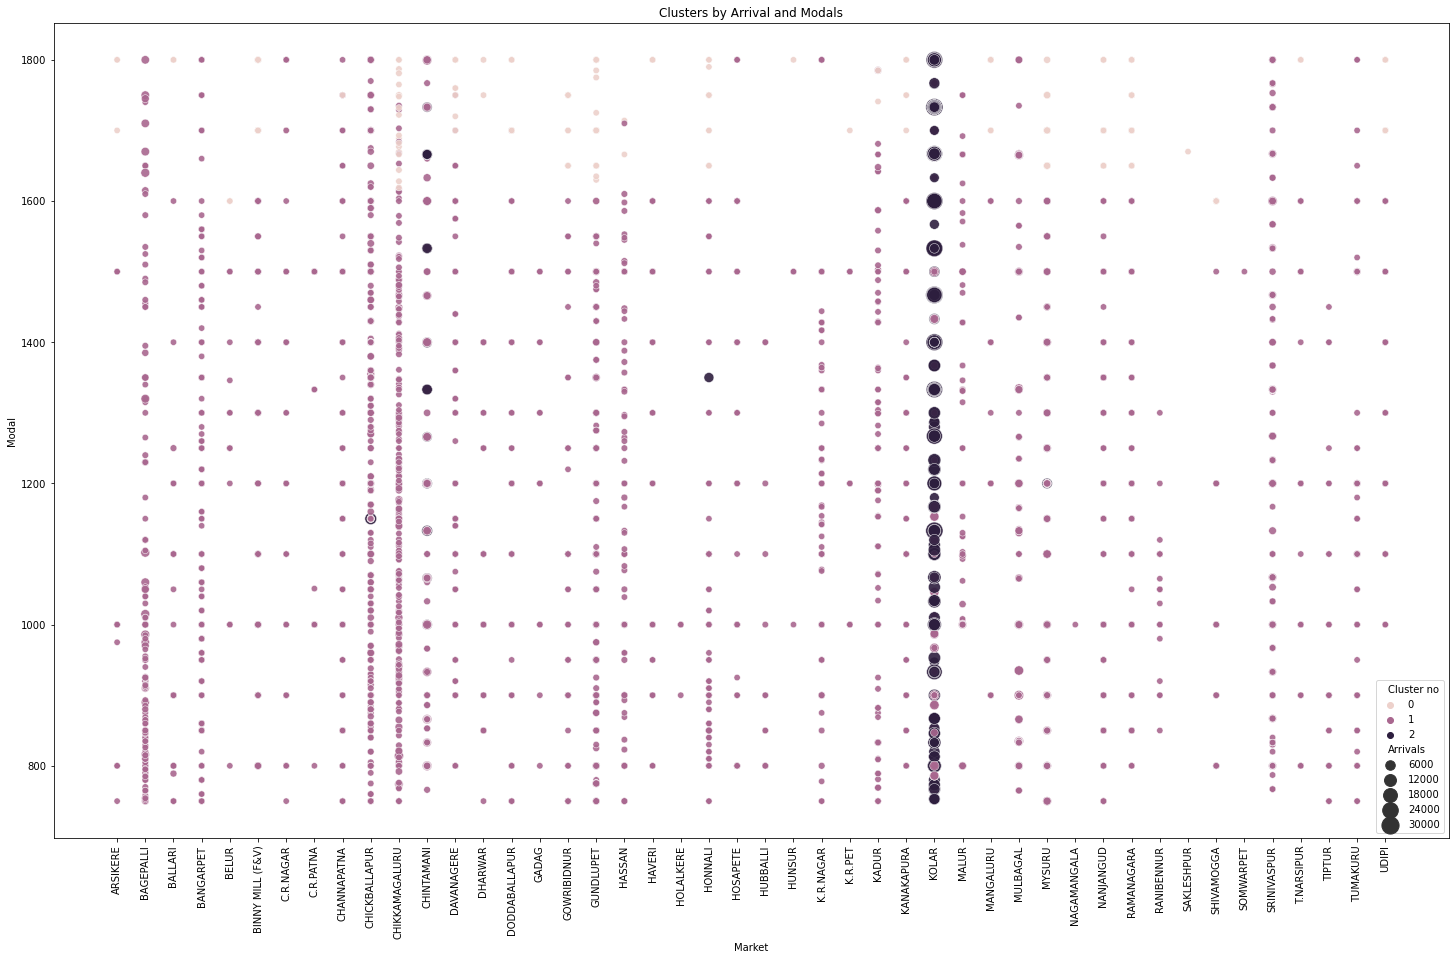

In [142]:


# x_axis=df_segm_pca_kmeans['Component2']
# y_axis=df_segm_pca_kmeans['Component1']
plt.figure(figsize =(25,15))
sns.scatterplot('Market', 'Modal', hue= 'Cluster no', data=test_outlier,
                size ='Arrivals', sizes=(40, 300), alpha = .9 )
plt.xticks(rotation=90)
plt.title('Clusters by Arrival and Modals')
plt.show()


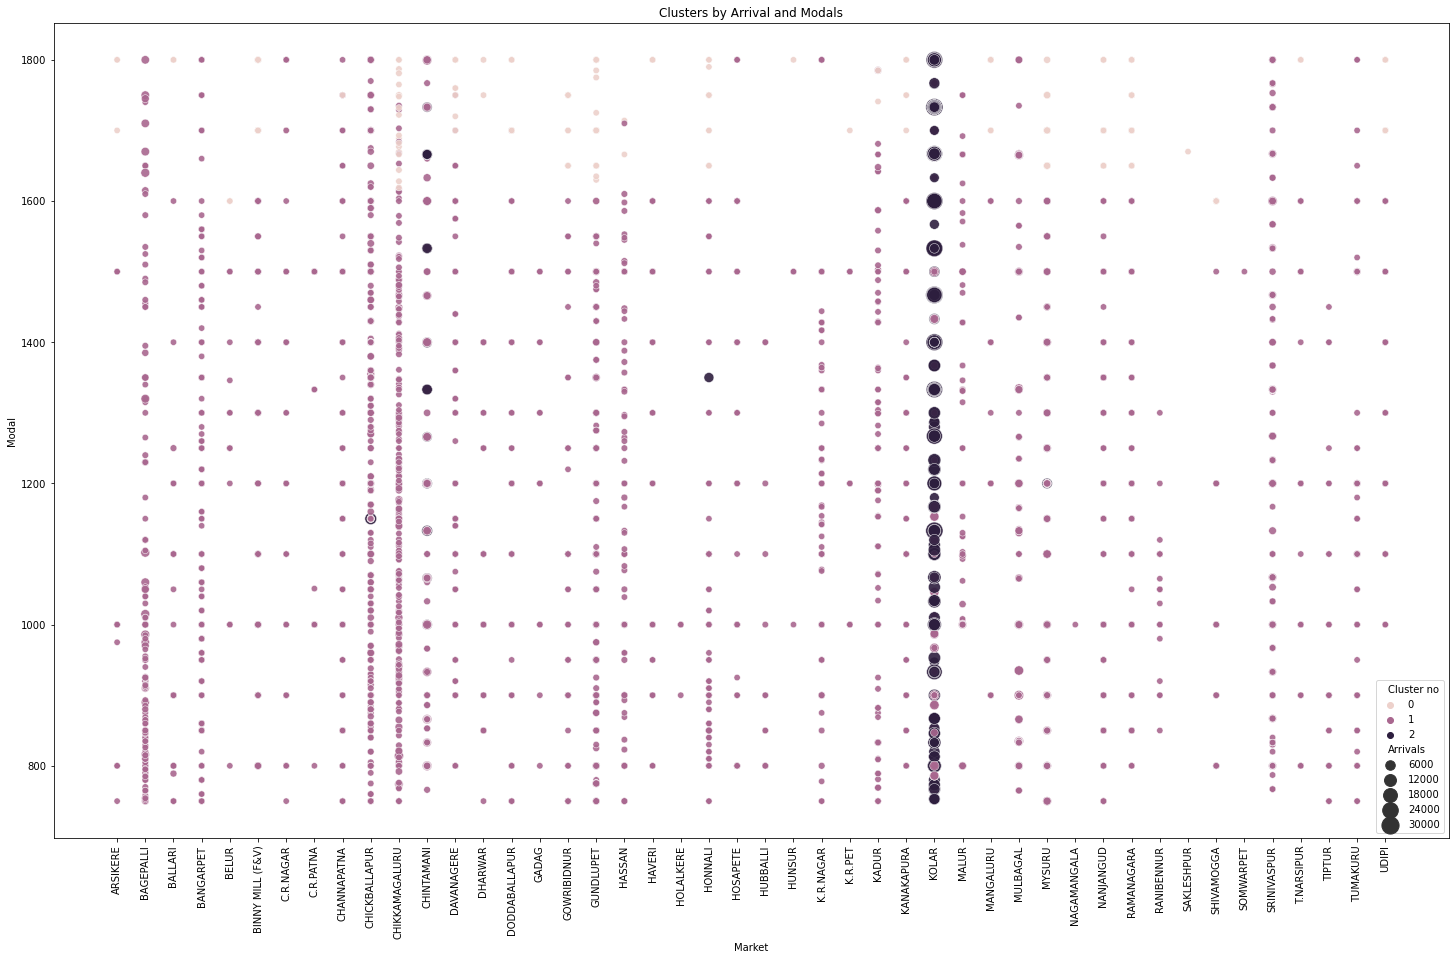

In [143]:
# color_dict = dict({'AVERAGE':'green',
#                  'MEDIUM':'red'})

# x_axis=df_segm_pca_kmeans['Component2']
# y_axis=df_segm_pca_kmeans['Component1']
plt.figure(figsize =(25,15))
sns.scatterplot('Market', 'Modal', hue= 'Cluster no', data=test_outlier,
                size ='Arrivals', sizes=(40, 300), alpha = .9 )
plt.xticks(rotation=90)
plt.title('Clusters by Arrival and Modals')
plt.show()


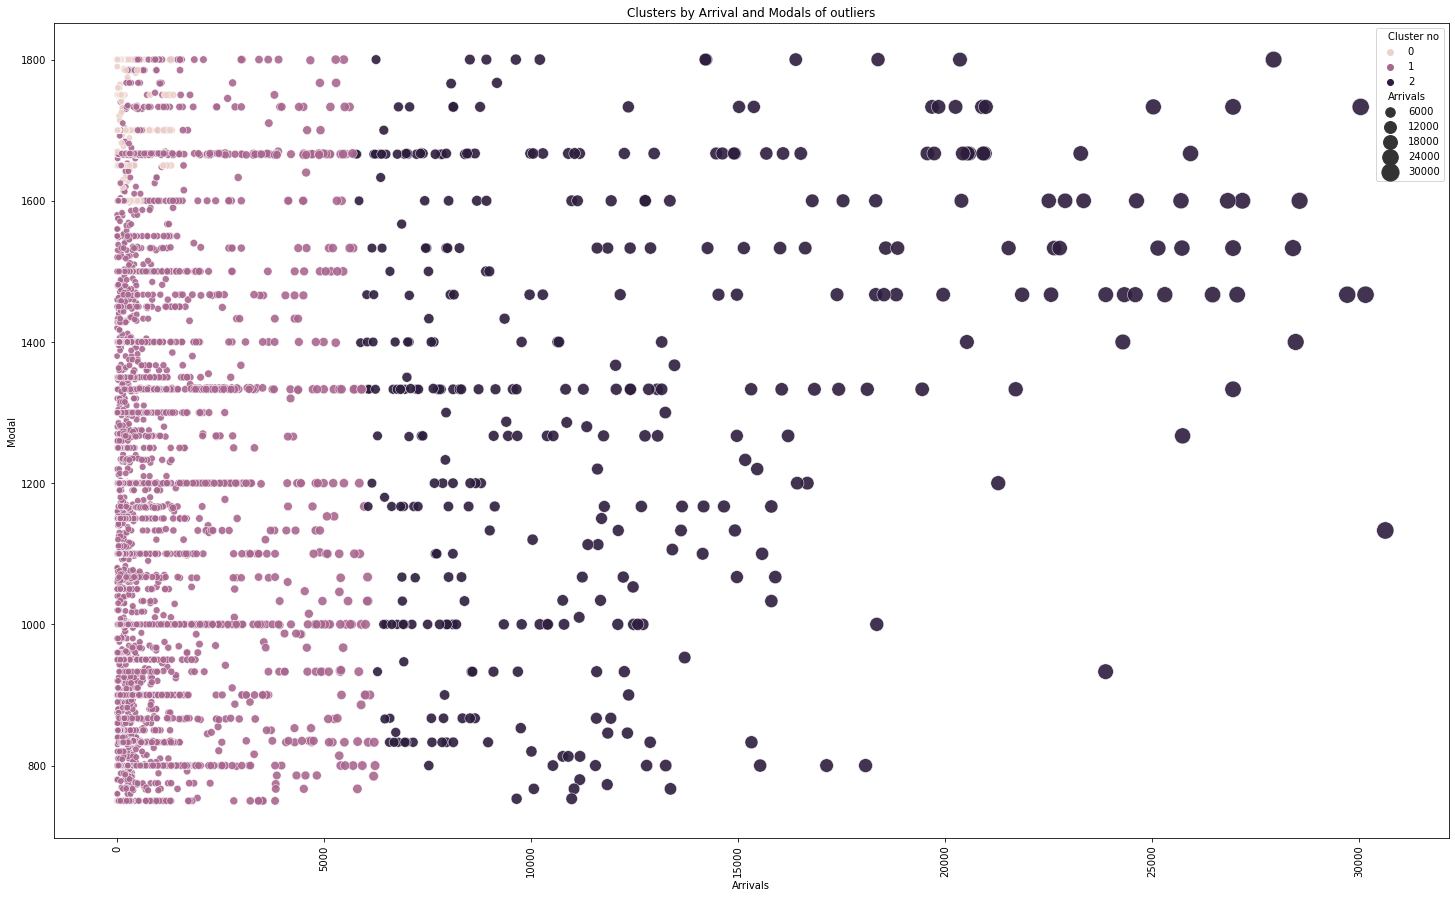

In [144]:

plt.figure(figsize =(25,15))
sns.scatterplot('Arrivals', 'Modal', hue= 'Cluster no', data=test_outlier,
                size ='Arrivals', sizes=(40, 300), alpha = .9 )
plt.xticks(rotation=90)
plt.title('Clusters by Arrival and Modals of outliers')
plt.show()

In [145]:
test_outlier[test_outlier['Cluster no']== 2]

,Market,Variety,Grade,Arrivals,Min,Max,Modal,Cluster no
Date,,,,,,,,
2020-12-06,CHICKBALLAPUR,TOMATO,AVERAGE,11700,380,1900,1150,2
2020-01-11,CHINTAMANI,TOMATO,AVERAGE,8115,333,2666,1333,2
2020-02-08,CHINTAMANI,TOMATO,AVERAGE,6350,533,3000,1666,2
2020-02-11,CHINTAMANI,TOMATO,AVERAGE,8400,466,2799,1666,2
2020-03-08,CHINTAMANI,TOMATO,AVERAGE,7200,533,2866,1066,2
...,...,...,...,...,...,...,...,...
2019-08-31,KOLAR,TOMATO,AVERAGE,6890,334,1733,1033,2
2019-10-31,KOLAR,TOMATO,AVERAGE,11675,334,2667,1034,2
2020-10-31,KOLAR,TOMATO,AVERAGE,22555,533,2533,1467,2


In [146]:
test_outlier

,Market,Variety,Grade,Arrivals,Min,Max,Modal,Cluster no
Date,,,,,,,,
2020-01-01,ARSIKERE,TOMATO,AVERAGE,10,1000,1000,1000,1
2019-01-08,ARSIKERE,TOMATO,AVERAGE,238,725,1000,1000,1
2019-02-08,ARSIKERE,TOMATO,AVERAGE,208,1000,1000,1000,1
2020-06-03,ARSIKERE,TOMATO,AVERAGE,4,1500,1500,1500,1
2019-06-08,ARSIKERE,TOMATO,AVERAGE,104,1000,1000,1000,1
...,...,...,...,...,...,...,...,...
2020-01-29,UDIPI,TOMATO,AVERAGE,47,1400,1600,1500,1
2020-12-29,UDIPI,TOMATO,AVERAGE,7,1200,1400,1300,1
2019-01-30,UDIPI,TOMATO,AVERAGE,8,1600,1900,1800,0
